## Group 3 - Project 2
# Online Shopper Purchase Prediction

In [9]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import model as Group3Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [17]:
#Read in CSV
online_shopping_df = pd.read_csv('online_shoppers_intention.csv')

online_shopping_df.info()

online_shopping_df["VisitorType"].value_counts()
online_shopping_df["Month"].value_counts()

# online_shopping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

## Change strings to integers for some preprocessing to visualize distributions

In [ ]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 
          'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
online_shopping_df["Month"] = online_shopping_df["Month"].map(months)

visitor = {'New_Visitor': 1, 'Returning_Visitor': 1, 'Other': 2}
online_shopping_df["VisitorType"] = online_shopping_df["VisitorType"].map(visitor)

In [12]:
online_shopping_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12.0,4,6,1,1,1,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11.0,3,2,1,8,1,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11.0,3,2,1,13,1,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11.0,2,2,3,11,1,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,11.0,3,2,1,2,1,True,False


## Visualize PCA

In [4]:
pca_model = PCA(n_components=2)

<Axes: xlabel='OperatingSystems', ylabel='Count'>

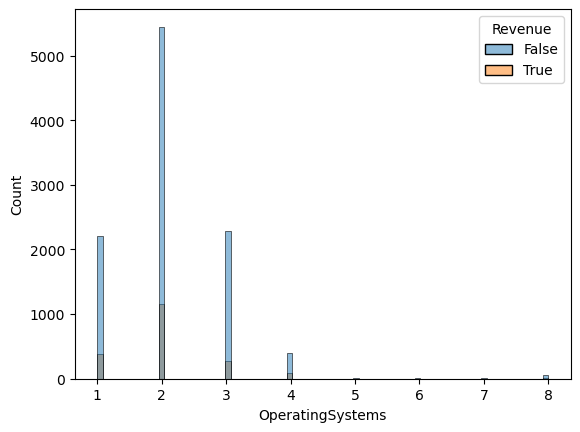

In [5]:
#EDA
sns.histplot(data=online_shopping_df, x='OperatingSystems', hue='Revenue')

<Axes: xlabel='ExitRates', ylabel='Count'>

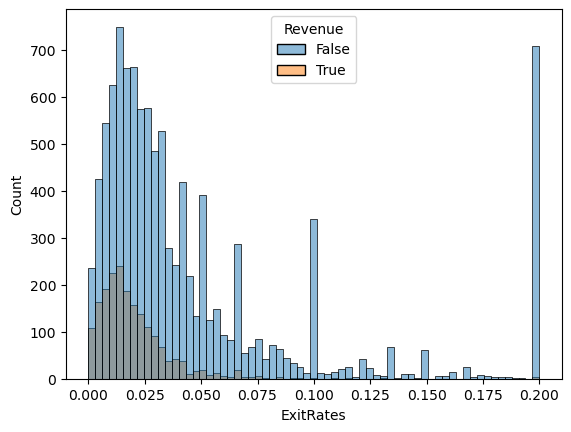

In [6]:
sns.histplot(data=online_shopping_df, x='ExitRates', hue='Revenue')

In [7]:
online_shopping_df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,2.290626,81.354250,0.535517,35.201694,31.136231,1173.889025,0.021144,0.042207,5.754933,0.061823,2.119689,2.355498,3.115472,4.048005
std,3.274664,178.326878,1.290013,133.411907,40.371936,1709.965891,0.045754,0.046537,17.966614,0.200208,0.886636,1.666595,2.370657,3.894575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.458333,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,6.000000,0.000000,0.000000,18.000000,605.672222,0.003333,0.025575,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,95.250000,0.000000,0.000000,38.000000,1461.695833,0.016808,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,24.000000,2720.500000,10.000000,1767.666667,501.000000,21672.244250,0.200000,0.200000,255.569158,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
#Drop the target column, setup X and y datasets for train test split
X = online_shopping_df.drop('Revenue', axis=1)
y = online_shopping_df['Revenue']

# Set seed for reproducibility
SEED = 42

#Train Test Split
X_test, X_train, y_test, y_train = train_test_split(X, y, random_state=SEED)
X_train.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
8916,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0.0,11.0,1,8,6,11,1,False
772,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0.0,3.0,2,2,3,2,1,False
12250,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0.0,11.0,2,2,2,2,1,False
7793,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0.0,8.0,2,5,7,4,1,False
6601,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0.0,8.0,2,2,3,1,1,True


<Figure size 1200x600 with 0 Axes>

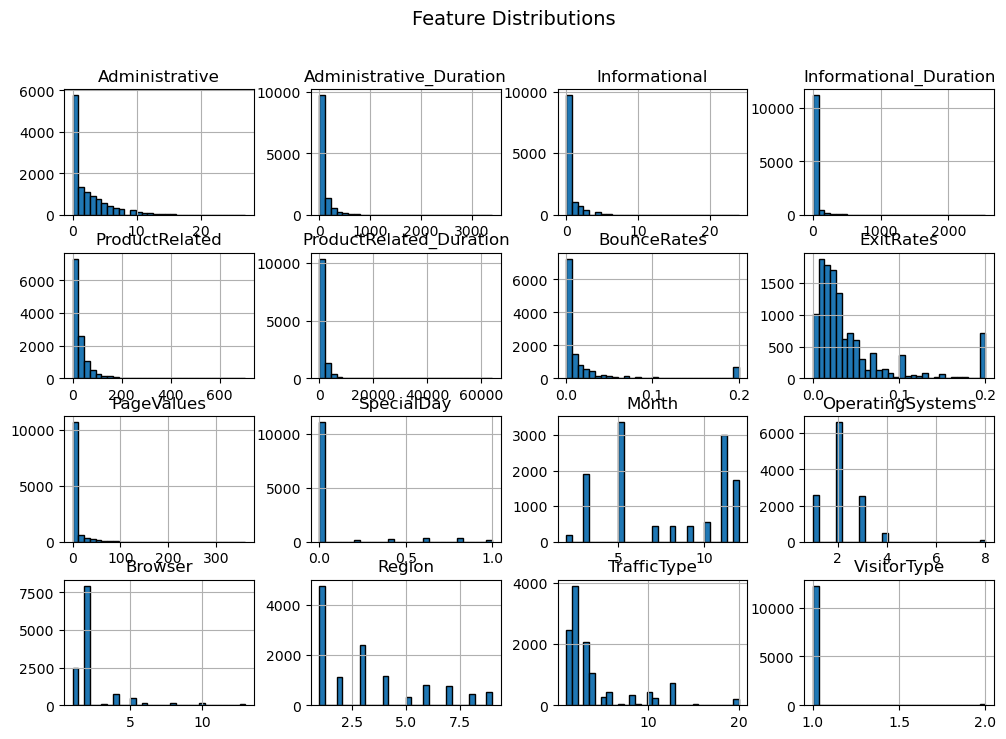


🔹 Boxplots for Outlier Detection


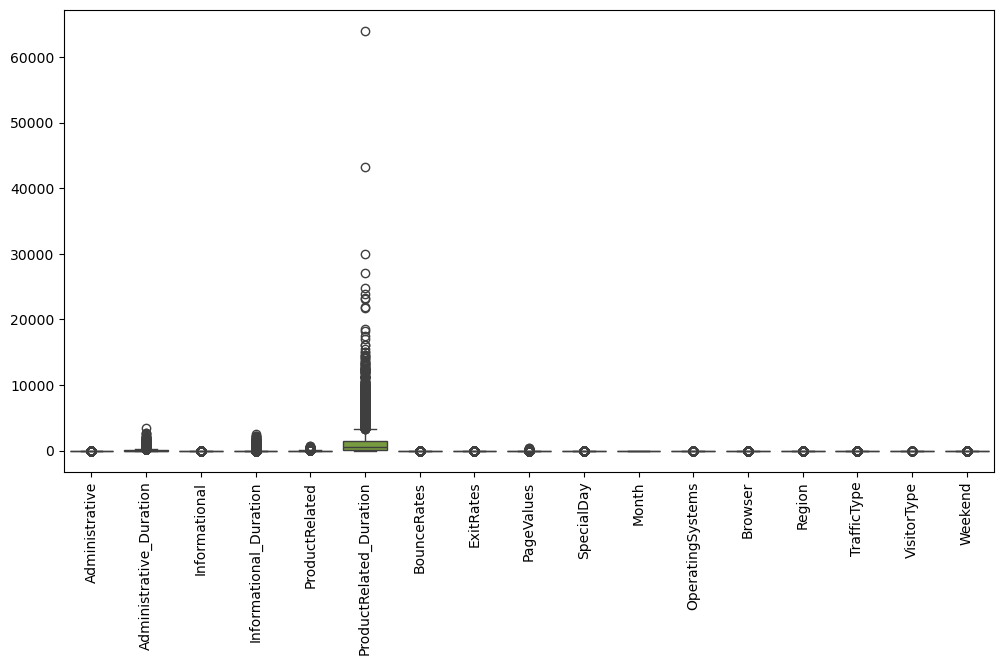


🔹 Correlation Heatmap


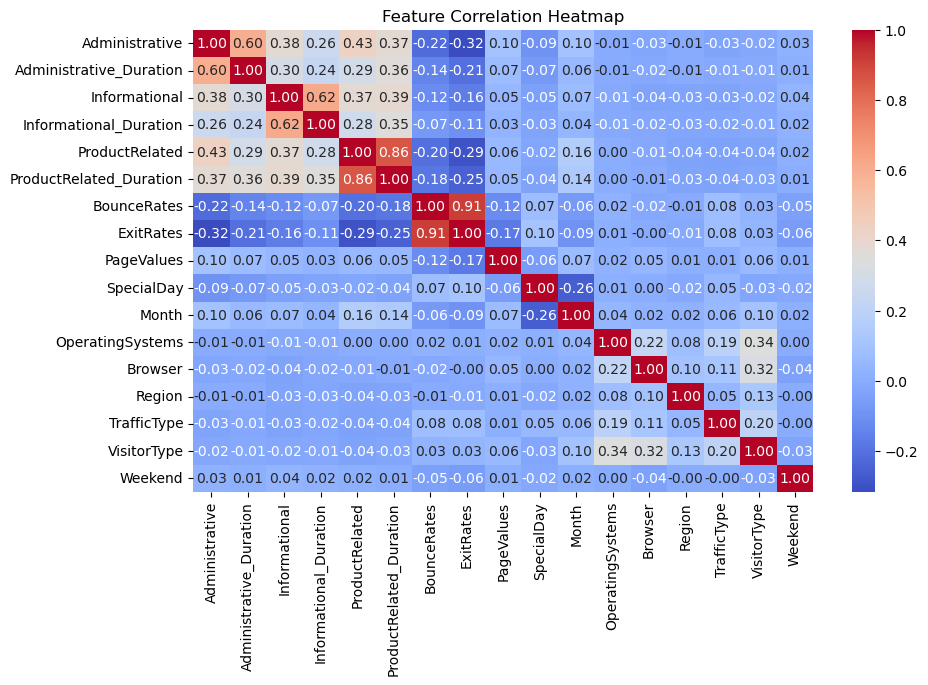

In [16]:
plt.figure(figsize=(12, 6))
X.hist(figsize=(12, 8), bins=30, edgecolor="k")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

print("\n🔹 Boxplots for Outlier Detection")
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

print("\n🔹 Correlation Heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Add Encodings to Feature Columns

In [15]:
#Encode VisitorType Column
ordinal_encoder = OrdinalEncoder()
X_train['VisitorType'] = ordinal_encoder.fit_transform(X_train[['VisitorType']])


## run function to generate csv file with reports on all model functions in model.py starting with model_

In [16]:
Group3Models.evaluate_models(X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
  File "c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [20]:
model = Group3Models.ADABoost_V2()
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.874 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.900 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.880 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.886 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.886 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.883 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.906 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.888 total time=   0.1s
[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.896 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.893 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.885 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=200;, score=0.900 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=200;, score=0.885 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=200;, score=0.901 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.896 total time=   0.3s
[CV 1/5] END learning_rate=0.5, n_estimators=50;, score=0.878 total time=   0.0s
[CV 2/5] END learning_rate=0.5, n_estimators=50;, score=0.901 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=50;, score=0.883 total time=   0.0s
[CV 4/5] END learning_rate=0.5, n_estimators=50;, score=0.896 total time=   0.0s
[CV 5/5] END learning_rate=0.5, n_estimators=50;, score=0.898 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=100;, score=0.877 total time=   0.1s
[CV 2/5] END learning_rate=0.5, n_estimators=100;, score=0.901 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=100;, score=0.890 total time=   0.1s
[CV 4/5] END learning_rate=0.5, n_estimators=100;, score=0.893 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=100;, score=0.888 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=200;, score=0.882 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=200;, score=0.904 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=200;, score=0.885 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=200;, score=0.891 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=200;, score=0.886 total time=   0.3s
[CV 1/5] END ..learning_rate=1, n_estimators=50;, score=0.880 total time=   0.0s
[CV 2/5] END ..learning_rate=1, n_estimators=50;, score=0.901 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..learning_rate=1, n_estimators=50;, score=0.890 total time=   0.0s
[CV 4/5] END ..learning_rate=1, n_estimators=50;, score=0.891 total time=   0.0s
[CV 5/5] END ..learning_rate=1, n_estimators=50;, score=0.883 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.883 total time=   0.1s
[CV 2/5] END .learning_rate=1, n_estimators=100;, score=0.900 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.890 total time=   0.1s
[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.893 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.875 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=200;, score=0.883 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=200;, score=0.893 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=200;, score=0.896 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=200;, score=0.890 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=200;, score=0.873 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

Model Score:  0.8918568184275981
Accuracy Score: 0.8918568184275981
Balanced Accuracy Score: 0.7609689504320911
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      7803
        True       0.68      0.57      0.62      1444

    accuracy                           0.89      9247
   macro avg       0.80      0.76      0.78      9247
weighted avg       0.89      0.89      0.89      9247



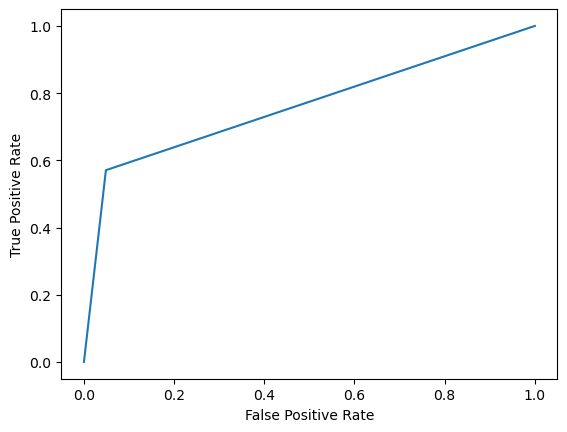

AUC Score: 0.760968950432091


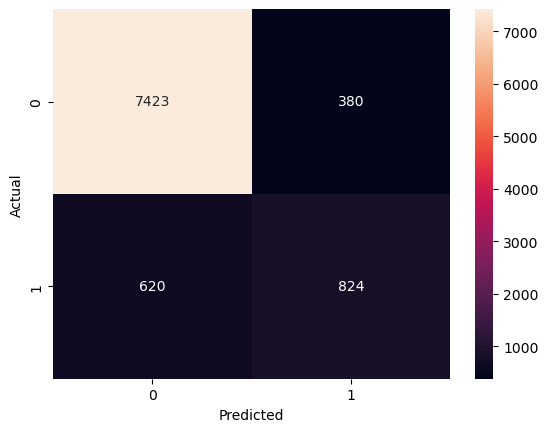

In [21]:
Group3Models.evaluate_model(model, X_test, y_test)

In [22]:
model = Group3Models.ADABoost_V3()
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.874 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.880 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.886 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.886 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.883 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.906 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.888 total time=   0.1s
[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.896 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.893 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.885 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=200;, score=0.900 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=200;, score=0.885 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=200;, score=0.901 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.896 total time=   0.3s
[CV 1/5] END learning_rate=0.5, n_estimators=50;, score=0.878 total time=   0.0s
[CV 2/5] END learning_rate=0.5, n_estimators=50;, score=0.901 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=50;, score=0.883 total time=   0.0s
[CV 4/5] END learning_rate=0.5, n_estimators=50;, score=0.896 total time=   0.0s
[CV 5/5] END learning_rate=0.5, n_estimators=50;, score=0.898 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=100;, score=0.877 total time=   0.1s
[CV 2/5] END learning_rate=0.5, n_estimators=100;, score=0.901 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=100;, score=0.890 total time=   0.1s
[CV 4/5] END learning_rate=0.5, n_estimators=100;, score=0.893 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=100;, score=0.888 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=200;, score=0.882 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=200;, score=0.904 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=200;, score=0.885 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=200;, score=0.891 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=200;, score=0.886 total time=   0.3s
[CV 1/5] END ..learning_rate=1, n_estimators=50;, score=0.880 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..learning_rate=1, n_estimators=50;, score=0.901 total time=   0.0s
[CV 3/5] END ..learning_rate=1, n_estimators=50;, score=0.890 total time=   0.0s
[CV 4/5] END ..learning_rate=1, n_estimators=50;, score=0.891 total time=   0.0s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..learning_rate=1, n_estimators=50;, score=0.883 total time=   0.0s
[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.883 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.890 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.893 total time=   0.1s
[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.875 total time=   0.1s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=200;, score=0.883 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=200;, score=0.893 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=200;, score=0.896 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=200;, score=0.890 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=200;, score=0.873 total time=   0.3s


c:\Users\hunte\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

Model Score:  0.8918568184275981
Accuracy Score: 0.8918568184275981
Balanced Accuracy Score: 0.7609689504320911
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      7803
        True       0.68      0.57      0.62      1444

    accuracy                           0.89      9247
   macro avg       0.80      0.76      0.78      9247
weighted avg       0.89      0.89      0.89      9247



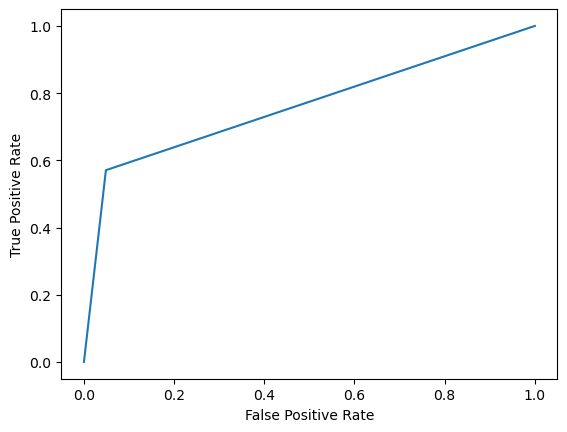

AUC Score: 0.760968950432091


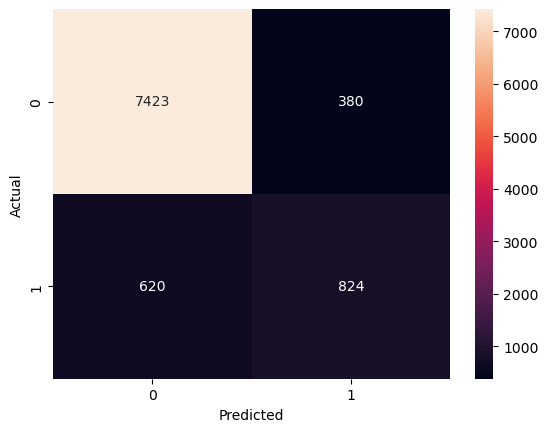

In [23]:
Group3Models.evaluate_model(model, X_test, y_test)